In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [5]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

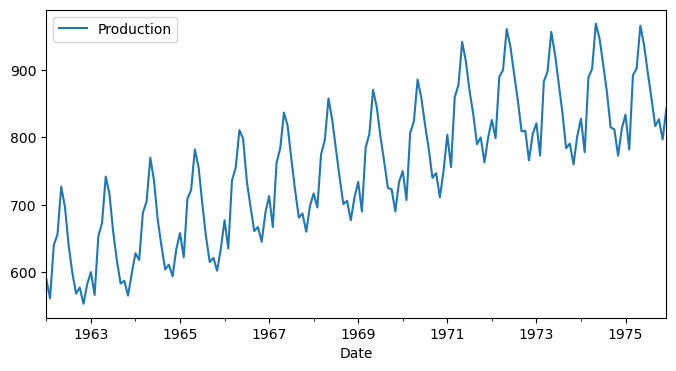

In [6]:
df.plot(figsize=(8,4))

In [7]:
len(df)

168

In [8]:
train = df.iloc[:158]
test = df.iloc[158:]

In [9]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

scaled_train = scalar.fit_transform(train)

scaled_test = scalar.fit_transform(test)

In [11]:
scaled_train[-12:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [12]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

ImportError: cannot import name 'TimeseriesGenerator' from 'keras.preprocessing.sequence' (/opt/anaconda3/lib/python3.11/site-packages/keras/api/preprocessing/sequence/__init__.py)

In [76]:
n_input = 3

generator = TimeseriesGenerator(scaled_train,scaled_train,n_input,batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

scaled_train: This is likely your training data that has been preprocessed or scaled for training purposes. It typically contains time series or sequential data.
scaled_train: target data
lengthen_input: This parameter specifies the length of the sequences that the generator will generate for training, n_input likely represents the number of time steps to be used as input to predict the next time step. For instance, if n_input is set to 10, the generator will create sequences of length 10.
batch_size=1: no of batches


In [47]:
x,y = generator[3]

print(f'Given the array:{x.flatten()}')
print(f'predict this y: {y}')

NameError: name 'generator' is not defined

In [48]:
x.shape

NameError: name 'x' is not defined

In [49]:
#we do same thing,but now instead for 12 months
n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

In [50]:
len(df)

168

In [51]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [52]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.fit(generator,epochs=50,batch_size=1)

NameError: name 'generator' is not defined

In [54]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

AttributeError: 'Sequential' object has no attribute 'history'

In [55]:
last_train_batch=scaled_train[-12:]

In [56]:
last_train_batch.shape

(12, 1)

In [57]:
last_train_batch

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [58]:
last_train_batch=last_train_batch.reshape(1,n_inputs,n_features)

In [59]:
last_train_batch.shape

(1, 12, 1)

In [60]:
pred=model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [61]:
pred

array([[0.00791593]], dtype=float32)

In [62]:
true_prediction=scalar.inverse_transform(pred)
true_prediction

array([[798.33777]], dtype=float32)

In [63]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [64]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [65]:
test_predictions=[]
first_eval_batch=scaled_train[-n_inputs:]
current_batch=first_eval_batch.reshape(1,n_inputs,n_features)

for i in range(len(test)):
    #get the prediction value for the first batch
    current_pred=model.predict(current_batch)[0]
    
    #append the prediction into the array
    test_predictions.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [66]:
current_pred

array([0.00548378], dtype=float32)

In [67]:
len(test)

10

In [68]:
test_predictions

[array([0.00791593], dtype=float32),
 array([0.01709973], dtype=float32),
 array([0.02001791], dtype=float32),
 array([0.01974805], dtype=float32),
 array([0.01779963], dtype=float32),
 array([0.01524834], dtype=float32),
 array([0.01253982], dtype=float32),
 array([0.01000995], dtype=float32),
 array([0.00759496], dtype=float32),
 array([0.00548378], dtype=float32)]

In [69]:
test.head(10)

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [70]:
true_predictions=scalar.inverse_transform(test_predictions)
true_predictions

array([[798.33779247],
       [799.8898548 ],
       [800.38302629],
       [800.33742089],
       [800.00813728],
       [799.57697018],
       [799.11922955],
       [798.69168218],
       [798.28354821],
       [797.92675867]])

In [71]:
test['predictions']=true_predictions

/var/folders/4g/m51tcqcx2jv621yd7trnjv5w0000gn/T/ipykernel_907/2081619921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


In [72]:
test

,Production,predictions
Date,,
1975-03-01,892,798.337792
1975-04-01,903,799.889855
1975-05-01,966,800.383026
1975-06-01,937,800.337421
1975-07-01,896,800.008137
1975-08-01,858,799.576970
1975-09-01,817,799.119230
1975-10-01,827,798.691682
1975-11-01,797,798.283548


<Axes: xlabel='Date'>

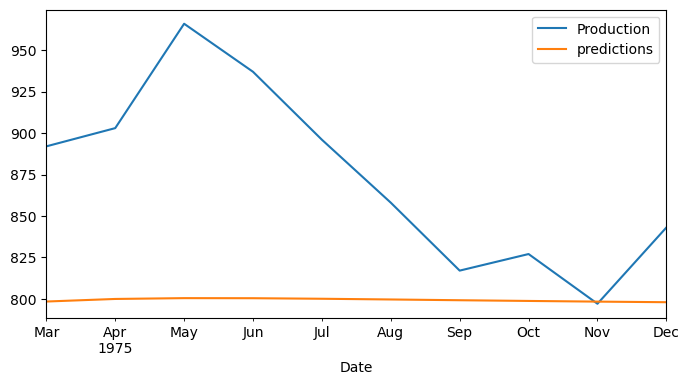

In [73]:
test.plot(figsize=(8,4))

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['predictions']))
rmse

90.16205919646222